# Homework 1 - Computer Simulation


## What are Small-world Network Models?
In the social network analysis field, many real-world networks like the Internet, Facebook network, have millions of nodes and billions of edges. Their topological structures are too complex and they are too large for researchers to analyze them. Researchers thus turn to generative models of networks. The idea is that If we could design models that generate graphs and guarantee that the simulated graphs are closely similar to real-world networks in terms of network properties, we can perform analysis on the synthetic networks instead of real-world networks in an easier way. Moreover, with the generative models of networks, we can not only better understand the mathematical basis of real-world networks but perform controlled experiments that may not be available to real-world networks.
Based on the aforementioned reasons, researchers have come up with several network models that generate small-world networks. In this post, we are going to list 3 most commonly heard network models in the social network analysis field.
* Erdos-Renyi Model
* Watts-Strogatz Model
* Barabasi-Albert Model

### Authors: SeyedEhsan Sajadi - Kamyab Abedi  

## importing libraries

In [1]:
import matplotlib.pyplot as plt #Viz
import networkx as nx # graph
import numpy as np # linear algebra
import random #Generat random number
print("Setup Complete")

Setup Complete


In [2]:
n = random.randint(1, 1000)
m = random.randint(1, n)
p = random.random()
k = random.randint(1, n)
print("Nodes : ", n)

nodes :  150


## Erdős–Rényi Model
The Erdos-Renyi Model is often called the Random Graph Model; it generates networks randomly depending on probability distributions. There are two variants of the Erdos-Renyi Model, G(n,p) and G(n,m), and they are closely similar to each other.

## Network Generation
Using the G(n,p) model, we generate an undirected network with n nodes and each possible edge in the network is generated independently and identically distributed with probability p.
Using the G(n,m) model, we generate an undirected network with n nodes and m edges selected uniformly at random.
### Limitations
* Its degree distribution differs from that of real-world networks, which usually follow power-law.
* The clustering coefficients of the Erdos-Renyi networks are too small.
* Most importantly, real-world networks are not generated randomly.

In [3]:
G1 = nx.erdos_renyi_graph(n=n, p=p)

## Watts-Strogatz Model
Since the Erdos-Renyi Model has a small clustering coefficient, which is quite different from real-world networks, the idea of the Watts-Strogatz model is to have high clustering coefficients with short average path lengths in generated models.

## Network Generation
We can have high clustering coefficients if we generate Regular Lattices, but they are fixed in the shape. We want to add randomness to the network and it can be done by random rewiring. The random rewiring process can create long-distance connections and add randomness to the generated network.
Generate a regular lattices
For each edge in the network, rewire with probability p while avoiding self-loops and link duplication (multiple edges)

### Limitations
* It still has unrealistic degree distribution which does not follow power-law
* Fixed number of nodes, unlike real network number of nodes continually grows


In [4]:
G3 = nx.watts_strogatz_graph(n=n, k=k, p=p)

## Barabási–Albert model
The two random network models mentioned above are limited to two conditions, which are different from real-world networks.
* Unrealistic degree distribution
* Fixed number of nodes
To resolve the limitations, researchers tried to model how real-world networks came into being. As a result, they observed the following characteristics and developed the Barabasi-Albert model.
* Real-world network construction is the product of a steady growth process. This characteristic is described as continuous growth.
* New nodes in most real networks prefer to link to the more connected nodes. This characteristic is described as preferential attachment.
The above two characteristics are the reasons that give real-world networks scale-free property, which is the property that makes the degree distribution follow power-law. The Barabasi-Albert model is designed to capture the mechanisms responsible for the emergence of the scale-free property of real-world networks.
### Network Generation
To build a Barabasi-Albert network, we start with m0 nodes, and the links between which are chosen arbitrarily, as long as each node has at least one link. The network develops the following two steps,
* At each timestep we add a new node with m (≤ m0) links that connect the new node to m nodes already in the network. This makes the network grow continually.
* The probability that a link of the new node connects to node i is proportional to node i’s degree. This is also known as preferential attachment.



In [5]:
from IPython.display import IFrame

# GIF link used as IFrame
iframe_url = "https://miro.medium.com/max/600/1*QuYD-YXvTdJcw0_-9q_fNw.gif"

# resized output IFrame
IFrame(src=iframe_url, width=600, height=550)

In [6]:
G2 = nx.barabasi_albert_graph(n=n, m=m)

# 1

In [7]:
print("Edge Number of Erdős–Rényi Model:", len(list(G1.edges)))
print("Edge Number of Barabási–Albert model:",len(list(G2.edges)))
print("Edge Number of Watts-Strogatz Model:",len(list(G3.edges)))

Edge Number of Erdős–Rényi Model: 1837
Edge Number of Barabási–Albert model: 441
Edge Number of Watts-Strogatz Model: 9900


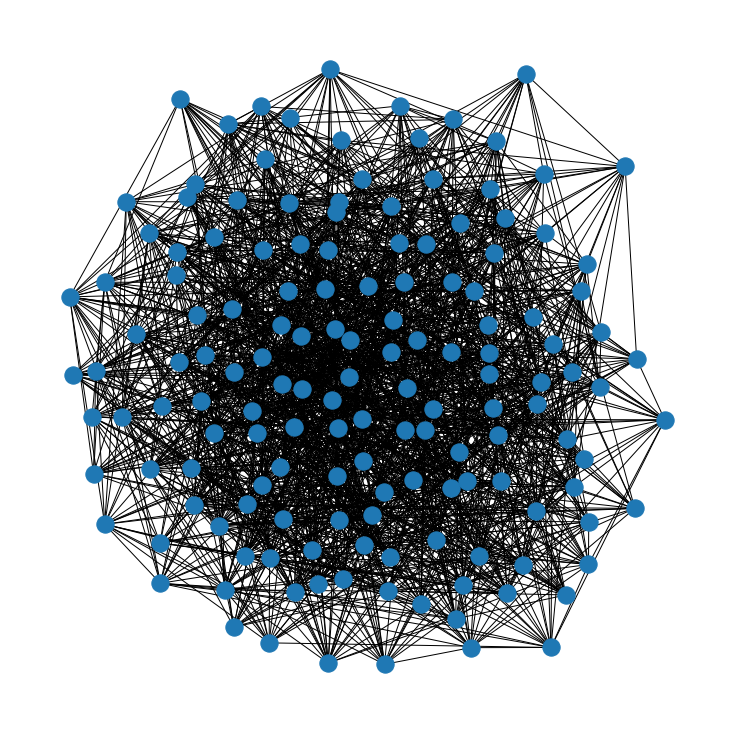

In [8]:
plt.figure(figsize=(10,10))
nx.draw(G1)

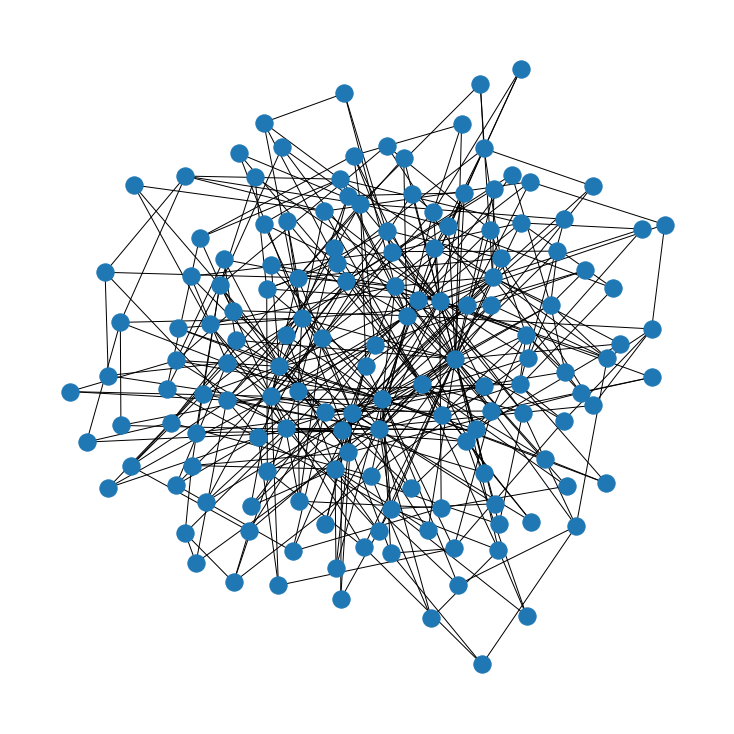

In [9]:
plt.figure(figsize=(10,10))
nx.draw(G2)

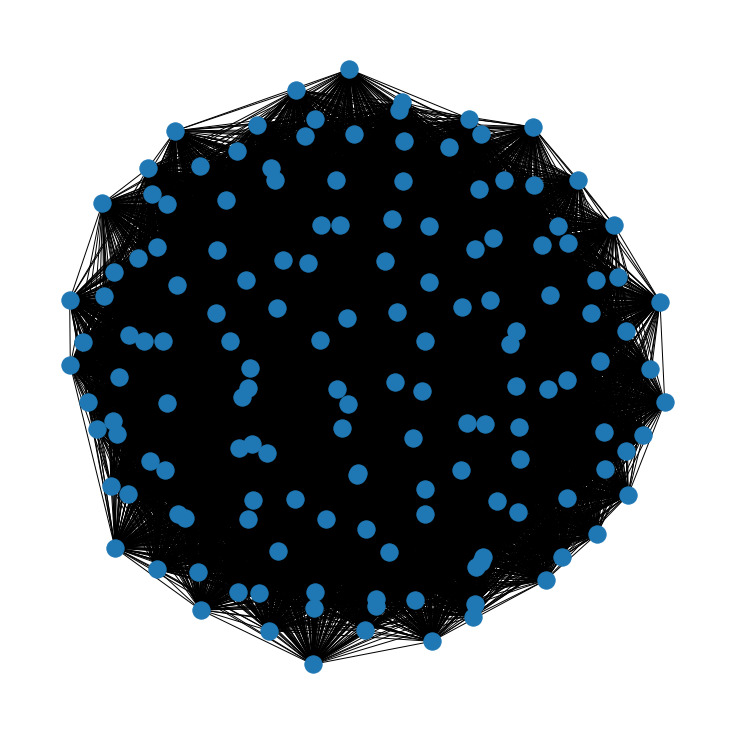

In [10]:
plt.figure(figsize=(10,10))
nx.draw(G3)

# 2

In [11]:
def isolate_edge_remove(graph: nx.classes.graph.Graph, number_of_tries=100):
    graph_temp = graph.copy()
    edges = list(graph.edges())
    indices = [i for i in range(len(edges))]
    x = []
    y = []
    for number_of_remove in range(len(edges)):
        number_of_isolates = 0
        for j in range(number_of_tries):
            graph = graph_temp.copy()
            find_isolates = False
            s = list(random.sample(indices, number_of_remove))
            for index in s:
                graph.remove_edge(edges[index][0], edges[index][1])
            if nx.number_of_isolates(graph) > 0:
                find_isolates = True
            if find_isolates:
                number_of_isolates += 1
        x.append(number_of_remove * 100 / len(edges))
        y.append(number_of_isolates / number_of_tries)
    return x, y

In [12]:
def connection_node_remove(graph: nx.classes.graph.Graph, number_of_tries=100):
    graph_temp = graph.copy()
    nodes = list(graph.nodes())
    x = []
    y = []
    for number_of_remove in range(len(nodes)):
        number_of_happens = 0
        for j in range(number_of_tries):
            graph = graph_temp.copy()
            s = list(random.sample(nodes, number_of_remove))
            for index in s:
                graph.remove_node(index)
            if nx.is_connected(graph):
                number_of_happens += 1
        x.append(number_of_remove * 100 / len(nodes))
        y.append(number_of_happens / number_of_tries)
    return x, y


In [13]:
def isolate_node_remove(graph: nx.classes.graph.Graph, number_of_tries=100):
    graph_temp = graph.copy()
    nodes = list(graph.nodes())
    x = []
    y = []
    for number_of_remove in range(len(nodes)):
        number_of_isolates = 0
        for j in range(number_of_tries):
            graph = graph_temp.copy()
            find_isolates = False
            s = list(random.sample(nodes, number_of_remove))
            for index in s:
                graph.remove_node(index)
            if nx.number_of_isolates(graph) > 0:
                find_isolates = True
            if find_isolates:
                number_of_isolates += 1
        x.append(number_of_remove * 100 / len(nodes))
        y.append(number_of_isolates / number_of_tries)
    return x, y


In [14]:
def connection_edge_remove(graph: nx.classes.graph.Graph, number_of_tries=100):
    graph_temp = graph.copy()
    edges = list(graph.edges())
    indices = [i for i in range(len(edges))]
    x = []
    y = []
    for number_of_remove in range(len(edges)):
        number_of_happens = 0
        for j in range(number_of_tries):
            graph = graph_temp.copy()
            s = list(random.sample(indices, number_of_remove))
            for index in s:
                graph.remove_edge(edges[index][0], edges[index][1])
            if nx.is_connected(graph):
                number_of_happens += 1
        x.append(number_of_remove * 100 / len(edges))
        y.append(number_of_happens / number_of_tries)
    return x, y


In [15]:
def plot_config(x, y, x_label, y_label, title, label):
    # Plotting barchart
    plt.plot(x, y, linestyle='-', label=label)
    # naming the x axis
    plt.xlabel(x_label)
    # naming the y axis
    plt.ylabel(y_label)
    # giving a title to my graph
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()



In [16]:
n = 30
m = 19
p = 0.48
number_of_tries = 100
G1 = nx.erdos_renyi_graph(n=n, p=p)
G2 = nx.barabasi_albert_graph(n=n, m=m)
G3 = nx.watts_strogatz_graph(n=n, k=14, p=p)

print("Edge Number of Erdős–Rényi Model:", len(list(G1.edges)))
print("Edge Number of Barabási–Albert model:",len(list(G2.edges)))
print("Edge Number of Watts-Strogatz Model:",len(list(G3.edges)))
    # pos = nx.spring_layout(G1)
    # nx.draw(G1, pos=pos, with_labels=True)
    # plt.show()
    
root_dir = 'drive/MyDrive/Colab Notebooks/my works/Simulation/output'


Edge Number of Erdős–Rényi Model: 216
Edge Number of Barabási–Albert model: 209
Edge Number of Watts-Strogatz Model: 210


# isolate (edges)

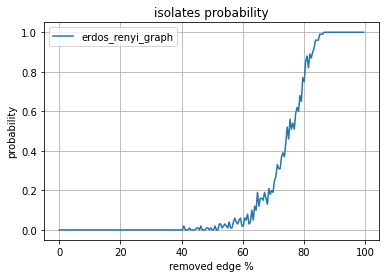

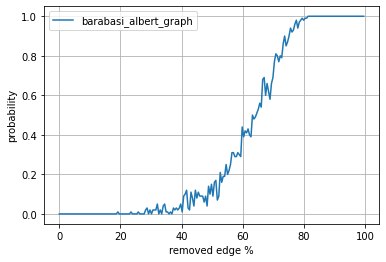

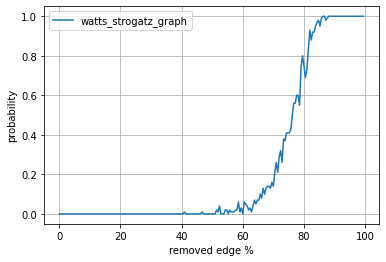

In [17]:

x, y = isolate_edge_remove(G1, number_of_tries)
plot_config(x, y, "removed edge %", "probability",
          "isolates probability", "erdos_renyi_graph")
x, y = isolate_edge_remove(G2, number_of_tries)
plot_config(x, y, "removed edge %", "probability",
          "", "barabasi_albert_graph")
x, y = isolate_edge_remove(G3, number_of_tries)
plot_config(x, y, "removed edge %", "probability",
          "", "watts_strogatz_graph")


# connection (edge)

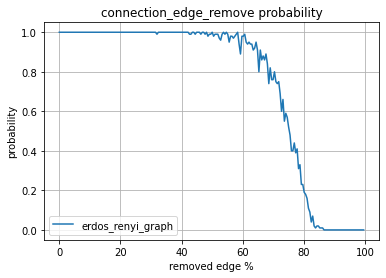

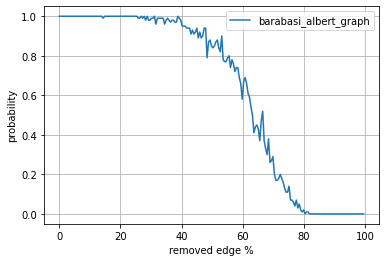

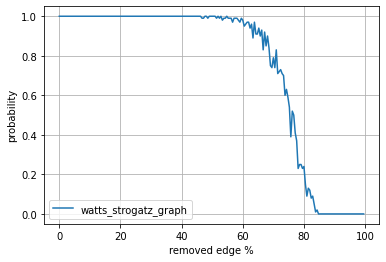

In [18]:
x, y = connection_edge_remove(G1, number_of_tries)
plot_config(x, y, "removed edge %", "probability",
          "connection_edge_remove probability", "erdos_renyi_graph")
x, y = connection_edge_remove(G2, number_of_tries)
plot_config( x, y, "removed edge %", "probability",
         "", "barabasi_albert_graph")
x, y = connection_edge_remove(G3, number_of_tries)
plot_config(x, y, "removed edge %", "probability",
          "", "watts_strogatz_graph")


# isolate (nodes)

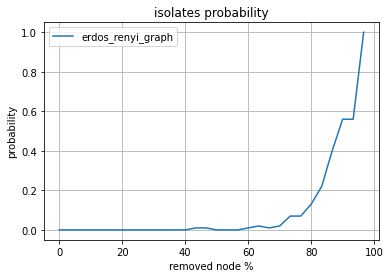

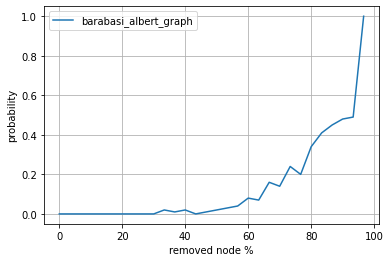

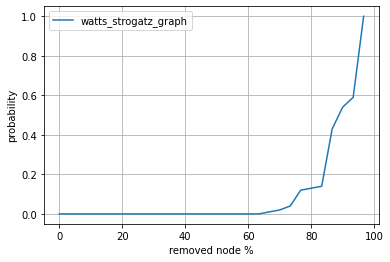

In [19]:
x, y = isolate_node_remove(G1, number_of_tries)
plot_config( x, y, "removed node %", "probability",
          "isolates probability", "erdos_renyi_graph")
x, y = isolate_node_remove(G2, number_of_tries)
plot_config( x, y, "removed node %", "probability",
         "", "barabasi_albert_graph")
x, y = isolate_node_remove(G3, number_of_tries)
plot_config( x, y, "removed node %", "probability",
          "", "watts_strogatz_graph")



# connection (nodes)

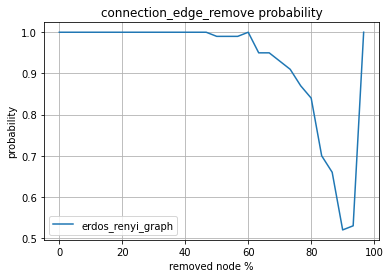

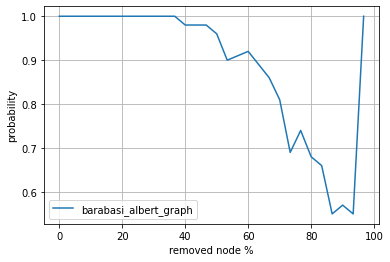

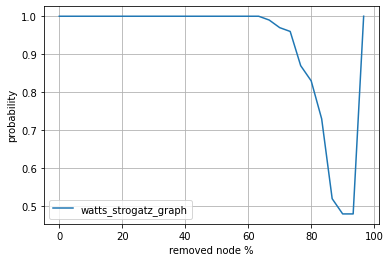

In [20]:
x, y = connection_node_remove(G1, number_of_tries)
plot_config(x, y, "removed node %", "probability",
          "connection_edge_remove probability", "erdos_renyi_graph")
x, y = connection_node_remove(G2, number_of_tries)
plot_config(x, y, "removed node %", "probability",
         "", "barabasi_albert_graph")
x, y = connection_node_remove(G3, number_of_tries)
plot_config(x, y, "removed node %", "probability",
          "", "watts_strogatz_graph")



# 4

## Summary
* Small-world networks are designed to generate networks that are similar to real-world networks to provide a mathematical explanation of real-world networks.
* The Erdos-Renyi Model and the Watts-Strogatz Model are generated randomly.
* The Barabasi-Albert model generates networks with scale-free property by adding continuous growth and preferential attachment characteristic in network generation.
* Overall, another limit of all small-network models is that random models generate only undirected networks, while many real-world networks are directed.